<a href="https://colab.research.google.com/github/Sanjeeth-S/Curneu-Assessment/blob/main/Problem_Statement_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [54]:
datae = pd.read_excel("fruits.xlsx")

In [55]:
datae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_label  59 non-null     int64  
 1   fruit_name   59 non-null     object 
 2   mass         59 non-null     int64  
 3   width        59 non-null     float64
 4   height       59 non-null     float64
 5   color_score  59 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.9+ KB


In [56]:
from sklearn.preprocessing import LabelEncoder
k = LabelEncoder()
datae['fruit_name'] = k.fit_transform(datae['fruit_name'])

In [57]:
datae.describe()

,fruit_label,fruit_name,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,1.406780,163.118644,7.105085,7.693220,0.762881
std,1.208048,1.247323,55.018832,0.816938,1.361017,0.076857
min,1.000000,0.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,0.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,1.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,3.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,3.000000,362.000000,9.600000,10.500000,0.930000


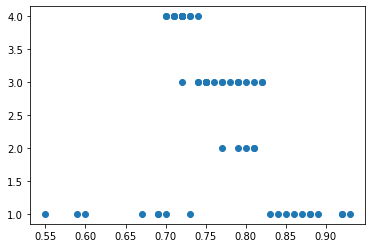

In [58]:
#df=datae.iloc[:,2:6]
#tar=data.iloc[:,1]
X=datae.color_score
y=datae.fruit_label
plt.scatter(X,y)

In [59]:
X = datae.drop('fruit_label', axis = 1)
y = datae['fruit_label']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
datae

array([0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [63]:
y_pred = classifier.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 4 0]
 [0 0 0 3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [65]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

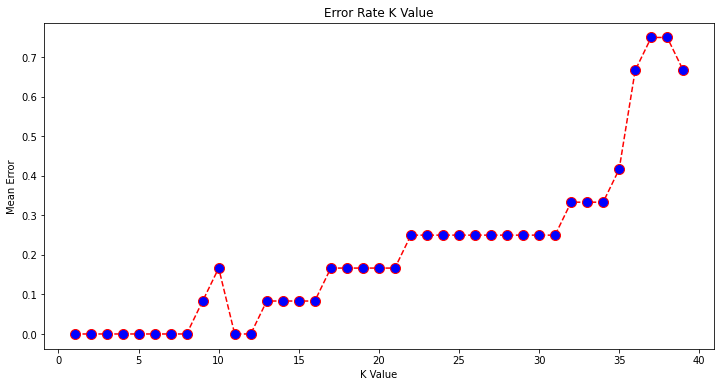

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')